***

<b> <center> Machine Learning </center>
    <h1><center> A3: Timed Unsupervised Learning Project</center></h1>
</b>
    <br><center> Team 7 </center></br>
    <center> Ariosto,Deniz, Estelle, Fengshi, Jaisanker, Linh</center>
  <center>  FMSBA3 (Castro)</center>
    <center>DAT5303 - Machine Learning</center>
<center>Professor Chase Kusterer</center>
<center>Hult International Business School</center>

 
    
***

<br><strong> Windows or Mac?</strong> 


Countless consumers have pondered this question when preparing to buy a new computer. As a result, Apple (AAPL) and Microsoft (MSFT) have been rigorously researching several aspects of consumer buying behavior in regards to the decision making behind this question. Both firms have commissioned research and analysis teams to study aspects such as system architecture, security, and overall performance.</br>

<br><strong> Objectives</strong>

</br> 
1. Run analysis on customer behavior based on 'Big Five personality traits' and 'Hult DNA'
2. Deliver an organized Jupyter Notebook that can be shared with Microsoft's internal analytical teams
3. Provide key insights along with external research to support findings and to give details related to important information such as audience size
</br>

<br>
<strong> Assumption</strong>

Data, including its demographics, are representative of the population which Microsoft is attempting to study.
</br>

<h3>Part I - Dataset Exploration</h3>

<h4>Preparing Libraries, Dataset File, and User-Defined Functions</h4><br>

In this section, all the necessary libraries, files, and user-defined functions will be ran so that we have all the necessary tools for exploratory data analysis and model development.

***
First, we  will import the necessary packages for our analysis:
* pandas as pd
* seaborn as sns
* Standard Scaler from sklearn.preprocessing
* PCA from sklearn.decomposition
* dendrogram and linkage from scipy.cluster.hierarchy
* KMeans from sklearn.cluster <br>

In [1]:
# import packages

import pandas                as     pd                  # data science essentials
import matplotlib.pyplot     as     plt                 # fundamental data visualization
import seaborn               as     sns                 # enhanced visualizations
from sklearn.preprocessing   import StandardScaler      # standard scaler
from sklearn.decomposition   import PCA                 # pca
from scipy.cluster.hierarchy import dendrogram, linkage # dendrograms
from sklearn.cluster         import KMeans              # k-means clustering

***
Here are user defined-functions to help us later in the analysis.

In [2]:
# User Defined functions
#------------------------------------------

# Inertia plot
#------------------------------------------

def inertia_plot(data, max_clust = 50):
    """
PARAMETERS
----------
data      : DataFrame, data from which to build clusters. Dataset should be scaled
max_clust : int, maximum of range for how many clusters to check inertia, default 50
    """

    ks = range(1, max_clust)
    inertias = []


    for k in ks:
        # INSTANTIATING a kmeans object
        model = KMeans(n_clusters = k)


        # FITTING to the data
        model.fit(data)


        # append each inertia to the list of inertias
        inertias.append(model.inertia_)



    # plotting ks vs inertias
    fig, ax = plt.subplots(figsize = (12, 8))
    plt.plot(ks, inertias, '-o')


    # labeling and displaying the plot
    plt.xlabel('Number of clusters, k')
    plt.ylabel('Inertia')
    plt.xticks(ks)
    plt.show()

# scree_plot
#------------------------------------------

def scree_plot(pca_object, export = False):
    """
PARAMETERS
----------
pca_object   : PCA Object to be plotted
export       : True: exports image of plot, False: doesn't export it
    """
    # building a scree plot

    # setting plot size
    fig, ax = plt.subplots(figsize=(10, 8))
    features = range(pca_object.n_components_)


    # developing a scree plot
    plt.plot(features,
             pca_object.explained_variance_ratio_,
             linewidth = 2,
             marker = 'o',
             markersize = 10,
             markeredgecolor = 'black',
             markerfacecolor = 'grey')


    # setting more plot options
    plt.title('Scree Plot')
    plt.xlabel('PCA feature')
    plt.ylabel('Explained Variance')
    plt.xticks(features)

    if export == True:
    
        # exporting the plot
        plt.savefig('top_customers_correlation_scree_plot.png')
        
    # displaying the plot
    plt.show()

# Dendogram Plot
#------------------------------------------

# grouping data based on Ward distance
def dendogram(pca_scaled, filename):
    """
PARAMETERS
----------
pca_scaled   : PCA scaled object to be plotted
filename     : Filename to export image
    """
    standard_mergings_ward = linkage(y = pca_scaled,
                                 method = 'ward')


    # setting plot size
    fig, ax = plt.subplots(figsize=(12, 12))

    # developing a dendrogram
    dendrogram(Z = standard_mergings_ward,
           leaf_rotation = 90,
           leaf_font_size = 6)

    file = filename + ".png"
    # saving and displaying the plot
    plt.savefig(file)
    plt.show()    
    

# Box plot
#------------------------------------------

def box_plot(x_var, y_var, data_var):
    """
Functiot to create boxplots for a categorical variable

PARAMETERS
----------
x_var    : str, categorical variable 
cat_var  : str, response variable
data_var : DataFrame with response and categorical variables
    """

    fig, ax = plt.subplots(figsize = (12, 8))
    sns.boxplot(x = x_var,
            y = y_var,
            hue = 'Cluster',
            data = data_var)

    #plt.ylim(-10, 19)
    plt.tight_layout()
    plt.show()

    

***

Here, we will load the file 'Survey_Data_Final_Exam.xlsx' containing the survey answers of 392 respondents into Python and display the first five rows.

In [3]:
# loading data and setting display options
#------------------------------------------

# loading data
students_df = pd.read_excel('Survey_Data_Final_Exam.xlsx')

# setting print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)

students_df.head(n=5)

,surveyID,Am the life of the party,Feel little concern for others,Am always prepared,Get stressed out easily,Have a rich vocabulary,Don't talk a lot,Am interested in people,Leave my belongings around,Am relaxed most of the time,Have difficulty understanding abstract ideas,Feel comfortable around people,Insult people,Pay attention to details,Worry about things,Have a vivid imagination,Keep in the background,Sympathize with others' feelings,Make a mess of things,Seldom feel blue,Am not interested in abstract ideas,Start conversations,Am not interested in other people's problems,Get chores done right away,Am easily disturbed,Have excellent ideas,Have little to say,Have a soft heart,Often forget to put things back in their proper place,Get upset easily,Do not have a good imagination,Talk to a lot of different people at parties,Am not really interested in others,Like order,Change my mood a lot,Am quick to understand things,Don't like to draw attention to myself,Take time out for others,Shirk my duties,Have frequent mood swings,Use difficult words,Don't mind being the center of attention,Feel others' emotions,Follow a schedule,Get irritated easily,Spend time reflecting on things,Am quiet around strangers,Make people feel at ease,Am exacting in my work,Often feel blue,Am full of ideas,See underlying patterns in complex situations,Don't generate ideas that are new and different,Demonstrate an awareness of personal strengths and limitations,Display a growth mindset,Respond effectively to multiple priorities,"Take initiative even when circumstances, objectives, or rules aren't clear",Encourage direct and open discussions,Respond effectively to multiple priorities.1,"Take initiative even when circumstances, objectives, or rules aren't clear.1",Encourage direct and open discussions.1,Listen carefully to others,Don't persuasively sell a vision or idea,Build cooperative relationships,Work well with people from diverse cultural backgrounds,"Effectively negotiate interests, resources, and roles",Can't rally people on the team around a common goal,Translate ideas into plans that are organized and realistic,Resolve conflicts constructively,Seek and use feedback from teammates,Coach teammates for performance and growth,Drive for results,What laptop do you currently have?,What laptop would you buy in next assuming if all laptops cost the same?,What program are you in?,What is your age?,Gender,What is your nationality?,What is your ethnicity?
0,a1000,4,3,4,3,4,2,3,2,3,2,2,1,5,4,4,4,4,2,2,3,4,3,4,2,3,2,4,2,2,3,3,2,5,4,4,3,3,2,3,3,3,3,4,2,4,3,3,4,2,3,4,2,4,4,4,4,4,4,4,4,4,3,4,4,4,2,4,4,4,4,4,Macbook,Macbook,DD (MIB & Business Analytics),25,Female,ecuador,Hispanic / Latino
1,a1001,2,4,3,4,3,3,2,3,4,2,3,1,4,4,5,3,4,2,4,2,3,5,3,4,4,3,4,2,1,1,2,2,5,4,4,4,4,3,2,2,2,3,5,4,5,4,5,5,3,4,4,2,2,4,4,4,5,5,5,5,5,2,4,4,2,3,4,5,5,4,5,Windows laptop,Windows laptop,One year Business Analytics,27,Male,Ecuador,Hispanic / Latino
2,a1002,4,4,5,1,4,3,2,2,5,1,3,3,5,1,2,3,2,1,5,4,3,4,4,3,3,2,3,2,2,2,4,3,1,2,5,4,3,2,1,2,5,3,4,4,2,3,3,3,1,4,3,2,5,3,5,2,3,5,2,3,3,2,3,4,4,2,4,2,3,3,5,Windows laptop,Windows laptop,One year Business Analytics,25,Male,Indian,West Asian / Indian
3,a1003,4,5,3,3,3,3,5,3,5,4,3,1,4,4,5,5,5,3,3,3,4,2,3,1,5,4,5,2,2,1,3,3,3,4,3,3,4,3,4,3,2,5,3,5,5,3,5,3,3,5,3,3,3,5,5,5,4,4,4,4,5,3,5,5,5,5,3,5,5,5,5,Windows laptop,Windows laptop,One year Business Analytics,26,Female,indian,West Asian / Indian
4,a1004,5,4,4,4,3,3,3,3,3,3,3,3,3,4,5,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,4,4,3,3,4,4,4,4,4,3,3,3,3,4,4,3,3,3,5,3,3,3,3,3,3,4,4,4,3,3,4,4,3,3,3,3,3,Macbook,Windows laptop,DD (MBA & Disruptive innovation),27,Male,China,Far east Asian


In [4]:
#Checking the info of the dataframe
# students_df.describe()

In [5]:
#students_df.info()

<h3>Part II - Data Cleaning </h3>

***

There are many observations in the 'nationality' column that reflect the same meaning, but are written differently. <br>
We are going to replace the values that are not cleaned with the defined ones so that the same nationalities can be grouped together appropriately.

In [6]:
# Cleaning data - Making nationalities properly aligned to make sure they are appropriately grouped

students_df["What is your nationality? "].replace({ "India"       : "Indian",
                                                    "indian"      : "Indian",
                                                    "INDIAN"      : "Indian",
                                                    "indian."     : "Indian",
                                                    "China"       : "Chinese",
                                                    "CHINA"       : "Chinese",
                                                    "chinese"     : "Chinese",
                                                    "china"       : "Chinese",
                                                    "American"    : "USA",
                                                    "Philippines" : "Filipino",     
                                                    "Filipino"    : "Filipino",
                                                    "Filipino "   : "Filipino",
                                                    "Spain"       : "Spanish",
                                                    "italian"     : "Italian",
                                                    "NIGERIAN"    : "Nigerian",
                                                    "Nigeria"     : "Nigerian",
                                                    "nigerian"    : "Nigerian",
                                                    "Brazil"      : "Brazilian",
                                                    "Russia"      : "Russian",
                                                    "Colombia"    : "Colombian",
                                                    "Ecuador"     : "Ecuadorian",
                                                    "ecuador"     : "Ecuadorian",
                                                    "colombian"   : "Colombian",
                                                    "canadian"    : "Canadian",
                                                    "Canada"      : "Canadian",
                                                    "Belgium"     : "Belgian",
                                                    "Peru"        : "Peruvian",
                                                    "South Korea" : "Korean",
                                                    "Costa Rica"  : "Costa Rican",
                                                    "English"     : "British",
                                                    "Mexico"      : "Mexican",
                                                    "mexican"     : "Mexican",
                                                    "Belgian "    : "Belgian",
                                                    "Germany"     : "German",
                                                    "Indonesia"   : "Indonesian",
                                                    "Thailand"    : "Thai",
                                                    "Venezuela"   : "Venezuelan",
                                                    "Armenia"     : "Armenian",
                                                    "Iran"        : "Iranian",
                                                    "Belarus"     : "Belarusian",
                                                    "Japan"       : "Japanese",
                                                    "Poland"      : "Polish",
                                                    "Malaysia"    : "Malaysian",
                                                    "Cameroon"    : "Cameroonian",
                                                    "Panama"      : "Panamanian",
                                                    "Mauritius"   : "Mauritian",
                                                    "El Salvador" : "El Salvadorian",
                                                    "Czech Republic": "Czech",
                                                    "Taiwan"        : "Taiwanese",
                                                    "Taiwan( R.O.C)": "Taiwanese",
                                                    "Korea"               : "Korean",
                                                    "Republic of Korea"   : "Korean",
                                                    "multi-ethnic"        : "Multiple",
                                                    "French/ Brazilian"   : "Multiple",
                                                    "Caribbean-American"  : "Multiple",
                                                    "Italian and Spanish" : "Multiple",
                                                    "British, Indian"     : "Multiple",
                                                    "German/American"     : "Multiple",
                                                    "Hispanic "           : "Multiple",
                                                    "Dominican "          : "Dominican",
                                                    "Dominican Republic"  : "Dominican",
                                                    "Congolese (DR CONGO)": "Congolese",
                                                    "."                   : "Prefer not to answer",
                                                    "calm"                : "Prefer not to answer",
                                                    "prefer not to answer": "Prefer not to answer",
                                                },
                                                  inplace=True)


***
On the columns showing the laptop that the respondent currently uses and the one they would buy, some respondents wrote 'MAC' instead of 'Macbook'. Every row with 'MAC' is going to be replaced with 'Macbook' for uniformity.

In [7]:
# Changing 'MAC' to 'Macbook' so it can be grouped with the other 'Macbook' responses

students_df["What laptop do you currently have?"].replace({ "MAC" : "Macbook",
                                                          },
                                                          inplace=True)
students_df["What laptop would you buy in next assuming if all laptops cost the same?"].replace({ "MAC" : "Macbook",
                                                                                                },
                                                                                                inplace=True)

***

There are three columns in the dataset that are duplicated (i.e. the question was asked twice):
* "Respond effectively to multiple priorities"
* "Take initiative even when circumstances, objectives, or rules aren't clear"
* "Encourage direct and open discussions" <br>

Both columns referring to the same attribute may have different results for one person, as they may have answered differently the second time the question was asked. We will create three columns that will evaluate the difference between the duplicated columns for each attribute.

In [8]:
# Compute the difference between the duplicated columns
# Creating 3 new columns that show the respective differences
students_df['diff_1'] = students_df["Take initiative even when circumstances, objectives, or rules aren't clear"] - students_df["Take initiative even when circumstances, objectives, or rules aren't clear.1"]
students_df['diff_2'] = students_df["Encourage direct and open discussions"]-students_df["Encourage direct and open discussions.1"]
students_df['diff_3'] = students_df["Respond effectively to multiple priorities"] - students_df["Respond effectively to multiple priorities.1"]


***
The following strategy was adopted for the differences:
- Rows with an absolute difference of 3 or more (for example, the respondent answered '1' the first time the question was asked, and then '4' the second time it was asked) will be removed from the dataset, because it shows distraction or indecisiveness from the respondent, and thus an accurate value cannot be imputed
<br> 
- For rows with an absolute difference of 2 or less, we will compute the average and keep it as a result in one column, dropping the duplicated column

In [9]:
# Get index from rows with a difference of 3 or more
indexNames = students_df[ abs(students_df['diff_1']) > 2 ].index
 
# Delete these row indexes from dataFrame
students_df.drop(indexNames , inplace=True)
# students_df['diff_1'].value_counts()

In [10]:
# Get index from rows with a difference of 3 or more
indexNames = students_df[ abs(students_df['diff_2']) > 2 ].index
 
# Delete these row indexes from dataFrame
students_df.drop(indexNames , inplace=True)
# students_df['diff_2'].value_counts()

In [11]:
# Get index from rows with a difference of 3 or more
indexNames = students_df[ abs(students_df['diff_3']) > 2 ].index
 
# Delete these row indexes from dataFrame
students_df.drop(indexNames , inplace=True)

#Reindex dataframe to ensure sequence of indexes
students_df.set_index(pd.np.arange(0,388), inplace=True)

***
Now, let's check for any missing value in the dataset.

In [12]:
# checking for missing values
for col in students_df:
    if students_df[col].isnull().astype(int).sum() > 0:
        students_df['MISSING_'+col] = students_df[col].isnull().astype(int)

***
The results shows that there is one missing value in 'What is your ethnicity?' column. We are going to impute it with 'Unknown' since it cannot be accurately imputed with a value.

In [13]:
fill = 'Unknown'
students_df['What is your ethnicity?'] = students_df['What is your ethnicity?'].fillna(fill)

In [14]:
students_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 0 to 387
Data columns (total 83 columns):
surveyID                                                                        388 non-null object
Am the life of the party                                                        388 non-null int64
Feel little concern for others                                                  388 non-null int64
Am always prepared                                                              388 non-null int64
Get stressed out easily                                                         388 non-null int64
Have a rich vocabulary                                                          388 non-null int64
Don't talk a lot                                                                388 non-null int64
Am interested in people                                                         388 non-null int64
Leave my belongings around                                                      388 non-null int64
Am 

***
Compute the average of each of the duplicated column and drop the duplicate columns, as well as columns used to calculate the differences between the responses, and the missing value flag column.

In [15]:
# Compute the average 
students_df['Respond effectively to multiple priorities'] = ((students_df['Respond effectively to multiple priorities']+students_df['Respond effectively to multiple priorities.1'])/2).round(0)

students_df["Take initiative even when circumstances, objectives, or rules aren't clear"] = ((students_df["Take initiative even when circumstances, objectives, or rules aren't clear"]+students_df["Take initiative even when circumstances, objectives, or rules aren't clear.1"])/2).round(0)

students_df['Encourage direct and open discussions'] = ((students_df['Encourage direct and open discussions']+students_df['Encourage direct and open discussions.1'])/2).round(0)
students_df['Encourage direct and open discussions'].value_counts()

# Drop the duplicated columns
students_df= students_df.drop(['Respond effectively to multiple priorities.1',
                               "Take initiative even when circumstances, objectives, or rules aren't clear.1",
                               'Encourage direct and open discussions.1',
                               "diff_1",
                               "diff_2",
                               "diff_3",
                               "MISSING_What is your ethnicity?"], 
                                axis =1)

***
For a better understanding of consumers' attitudes towards their current laptop, we will create new columns showing the change in laptop if given the possibility, and columns to show which brand the user is willing to keep. <br><br>
If a respondent would rather switch to a different laptop than their current one without taking price into consideration, then the new column, <strong>'laptop_change'</strong>, will be filled with 'Change'; otherwise, it will be filled with 'Same'. 
<br><br>
If there is a change, the new column, <strong>'change_to'</strong>, will be filled with either 'Macbook', 'Windows laptop', or 'Chromebook' depending on which laptop the respondent would like to switch to; otherwise, it will be filled with 'None' (as there is no change).

In [16]:
# Creating the columns
students_df['laptop_change'] = 'Same'
students_df['change_to'] = 'None'
students_df['Windows_same'] = 0
students_df['Macbook_same'] = 0

# Fill in based on the data
for i,x in students_df.iterrows():
    if students_df.loc[i,'What laptop do you currently have?'] == students_df.loc[i,'What laptop would you buy in next assuming if all laptops cost the same?']:
        students_df.loc[i,'laptop_change'] = 'Same'
        
        if str(students_df.loc[i,'What laptop would you buy in next assuming if all laptops cost the same?']) == 'Macbook':
            
            students_df.loc[i,'Macbook_same'] = 1
            students_df.loc[i,'Windows_same'] = 0
        
        else:
            
            students_df.loc[i,'Macbook_same'] = 0
            students_df.loc[i,'Windows_same'] = 1
        
    else:
        
        students_df.loc[i,'laptop_change'] = 'Change'
        students_df.loc[i,'change_to'] = students_df.loc[i,'What laptop would you buy in next assuming if all laptops cost the same?']


<h3>Part III - 'Big Five personality traits' Analysis

Now, we are going to run an analysis on customer behavior based on the <a href="https://www.verywellmind.com/the-big-five-personality-dimensions-2795422">Big Five personality traits</a>. These are five broad dimensions of personality that may help to anticipate and understand human behavior. The five different traits are as follows:
 <br>
 
* <strong>Extroversion (E):</strong> characterized by excitability, socialiability, talkativeness, assertiveness, and high amounts of emotional expressiveness. <strong>High</strong> scorers tend to be very outgoing and gain energy in social settings, while <strong>low</strong> scorers tend to be more reserved, and may find social events draining. <br>

* <strong>Agreeableness (A):</strong> reflects much individuals adjust their behavior to suit others. <strong>High</strong> scorers are typically cooperative and polite; <strong>low</strong> scorers tend to be more competitive and blunt. <br>

* <strong>Conscientiousness (C):</strong> includes being thoughtful and hardworking. <strong>High</strong> scorers tend to be more organized and follow rules. <strong>Low</strong> scorers may be disorganized and averse to structure. <br>

* <strong>Neuroticism (N)</strong>: characterized by emotional instability and moodiness. <strong>High</strong> scorers tend to experience mood swings, anxiety, irritability, and sadness, while those </strong>low</strong> in this trait tend to be more stable and emotionally resilient.<br>

* <strong>Openness to Experience (O)</strong>: the personality trait of seeking new experience and intellectual pursuits. <strong>High</strong> scorers may be more creative, curious, and imaginative. <strong>Low</strong> scorers may be more down-to-earth and tend to dislike abstract concepts.
<br>
    
---

The questions related to the 'Big Five personality traits', i.e. the first 50 questions, are going to be extracted into a new dataframe called 'new_df'. The other questions are either questions related to the Hult DNA or demographic questions, hence they will be dropped for this analysis. Demographic data must be dropped to as to limit biases in our PCA, and only focus on behavior rather than factors out of respondents' control.

In [17]:
# Create a dataframe with the test question by dropping the other ones
new_df = students_df.drop([   "surveyID", 
                              "See underlying patterns in complex situations", 
                              "Don't  generate ideas that are new and different", 
                              'Demonstrate an awareness of personal strengths and limitations', 
                              'Display a growth mindset', 
                              'Respond effectively to multiple priorities', 
                              "Take initiative even when circumstances, objectives, or rules aren't clear", 
                              'Encourage direct and open discussions',
                              'Listen carefully to others', 
                              "Don't persuasively sell a vision or idea", 
                              "Build cooperative relationships", 
                              'Work well with people from diverse cultural backgrounds', 
                              'Effectively negotiate interests, resources, and roles', 
                              "Can't rally people on the team around a common goal", 
                              'Translate ideas into plans that are organized and realistic', 
                              'Resolve conflicts constructively', 
                              'Seek and use feedback from teammates', 
                              'Coach teammates for performance and growth', 
                              'Drive for results', 
                              'What laptop do you currently have?', 
                              'What laptop would you buy in next assuming if all laptops cost the same?', 
                              'What program are you in?', 
                              'What is your age?', 
                              'Gender', 
                              'What is your nationality? ', 
                              'What is your ethnicity?',
                              'laptop_change',
                              'change_to',
                              'Windows_same',
                              'Macbook_same'
                              ],
                              axis =1)
     

<h4>Feature Engineering</h4>

Here, new features will be engineered for each trait, based on <a href="https://openpsychometrics.org/printable/big-five-personality-test.pdf">respective calculations for each trait</a>. 
<br>
Each question in the survey is relevant to one of the five traits, so the questions were grouped by trait. If a high response (i.e. 5, being 'agree') on a question meant that the respondent was more likely to have an affinity towards the respective personality trait, then it was <i>added</i> in the formula. Conversely, if a high response on a question meant that the respondent more likely <strong>not</strong> to have the respective personality trait, then it was <i>subtracted</i> in the formula.
<br>

In [18]:
#Feature engineering for Big 5 personality traits

new_df['Extroversion']        = (20 + new_df['Am the life of the party']                               # contributes to extroversion (+)
                                    - new_df["Don't talk a lot"]                                       # opposes extroversion (-)
                                    + new_df['Feel comfortable around people']                         # contributes to extroversion (+)
                                    - new_df['Keep in the background']                                 # opposes extroversion (-)
                                    + new_df['Start conversations']                                    # contributes to extroversion (+)
                                    - new_df['Have little to say']                                     # opposes extroversion (-)
                                    + new_df['Talk to a lot of different people at parties']           # contributes to extroversion (+)
                                    - new_df["Don't like to draw attention to myself"]                 # opposes extroversion (-)
                                    + new_df["Don't mind being the center of attention"]               # contributes to extroversion (+)
                                    - new_df['Am quiet around strangers'])                             # opposes extroversion (-)

new_df['Agreeableness']       = (14 - new_df['Feel little concern for others']                         # opposes agreeableness (-)
                                    + new_df['Am interested in people']                                # contributes to agreeableness (+)
                                    - new_df['Insult people']                                          # opposes agreeableness (-)
                                    + new_df["Sympathize with others' feelings"]                       # contributes to agreeableness (+)
                                    - new_df["Am not interested in other people's problems"]           # opposes agreeableness (-)
                                    + new_df['Have a soft heart']                                      # contributes to agreeableness (+)
                                    - new_df["Am not really interested in others"]                     # opposes agreeableness (-)
                                    + new_df["Take time out for others"]                               # contributes to agreeableness (+)
                                    + new_df["Feel others' emotions"]                                  # contributes to agreeableness (+)
                                    + new_df["Make people feel at ease"])                              # contributes to agreeableness (+)

new_df['Conscientiousness']   = (14 + new_df['Am always prepared']                                     # contributes to conscientiousness (+)
                                    - new_df['Leave my belongings around']                             # opposes conscientiousness (-)
                                    + new_df['Pay attention to details']                               # contributes to conscientiousness (+)
                                    - new_df['Make a mess of things']                                  # opposes conscientiousness (-)
                                    + new_df['Get chores done right away']                             # contributes to conscientiousness (+)
                                    - new_df['Often forget to put things back in their proper place']  # opposes conscientiousness (-)
                                    + new_df['Like order']                                             # contributes to conscientiousness (+)
                                    - new_df['Shirk my duties']                                        # opposes conscientiousness (-)
                                    + new_df['Follow a schedule']                                      # contributes to conscientiousness (+)
                                    + new_df['Am exacting in my work'])                                # contributes to conscientiousness (+)

new_df['Neuroticism']         = (38 - new_df['Get stressed out easily']                                # opposes Neuroticism
                                    + new_df['Am relaxed most of the time']                            # contributes to Neuroticism
                                    - new_df['Worry about things']                                     # opposes Neuroticism
                                    + new_df['Seldom feel blue']                                       # contributes to Neuroticism
                                    - new_df['Am easily disturbed']                                    # opposes Neuroticism
                                    - new_df['Get upset easily']                                       # opposes Neuroticism
                                    - new_df['Change my mood a lot']                                   # opposes Neuroticism
                                    - new_df['Have frequent mood swings']                              # opposes Neuroticism
                                    - new_df['Get irritated easily']                                   # opposes Neuroticism
                                    - new_df['Often feel blue'])                                       # opposes Neuroticism

new_df['Openness']            = ( 8 + new_df['Have a rich vocabulary']                                 # contributes to openness (+)
                                    - new_df['Have difficulty understanding abstract ideas']           # opposes openness (-)
                                    + new_df['Have a vivid imagination']                               # contributes to openness (+)
                                    - new_df['Am not interested in abstract ideas']                    # opposes openness (-)
                                    + new_df['Have excellent ideas']                                   # contributes to openness (+)
                                    - new_df['Do not have a good imagination']                         # opposes openness (-)
                                    + new_df['Am quick to understand things']                          # contributes to openness (+)
                                    + new_df['Use difficult words']                                    # contributes to openness (+)
                                    + new_df['Spend time reflecting on things']                        # contributes to openness (+)
                                    + new_df['Am full of ideas'])                                      # contributes to openness (+)
                                      
pca_df = new_df[['Extroversion','Agreeableness','Conscientiousness','Neuroticism','Openness']]                         

*** 
<h4>Scaling the data</h4>

The data will be standardized so that each feature's variance is measured on the same scale.

In [19]:
# Intanstiate a StandardScaler object
scaler = StandardScaler()

# Fit the scaler with the data
scaler.fit(pca_df)

# Transform the data
personality = scaler.transform(pca_df)

# convert scaled data into a DataFrame
personality_df = pd.DataFrame(personality)

#reattach columns
personality_df.columns = pca_df.columns

# checking pre- and post-scaling variance
#print(pd.np.var(pca_df))
#print(pd.np.var(personality_df))

<h4>Building a PCA Model </h4>

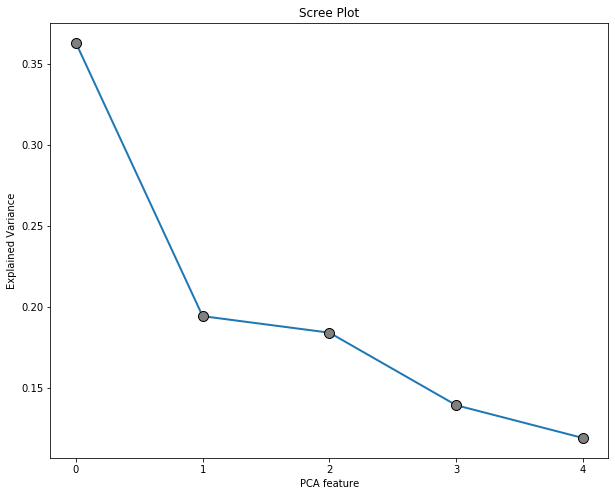

In [20]:
# INSTANTIATING a PCA object with no limit to principal components
pca = PCA(n_components=None,
          random_state = 802)


# FITTING and TRANSFORMING the scaled data
customer_pca = pca.fit_transform(personality_df)


# calling the scree_plot function
scree_plot(pca_object = pca)

<br>
The number of components we are going to use is <b>3</b>, based on the elbow in the scree plot. We can see that 1 and 2 are similar features, we choose 2 as to better understand the cluster 2 as we think it might add value to the analysis.</br>

In [21]:
# INSTANTIATING a new model using the first three principal components
pca_3 = PCA(n_components = 3,
            random_state = 222)

# FITTING and TRANSFORMING the scaled data
customer_pca = pca_3.fit_transform(personality_df)

# transposing pca components
factor_loadings_3 = pd.DataFrame(pd.np.transpose(pca_3.components_))


# naming rows as original features
factor_loadings_3 = factor_loadings_3.set_index(personality_df.columns)


# checking the results
print(f"""
3 Components Factor Loadings
-----------------------------------
{factor_loadings_3.round(2)}
""")

#Export results to excel file
personality_df.to_excel('Big5Personality.xlsx')

# calling the scree_plot function
# scree_plot(pca_2)


3 Components Factor Loadings
-----------------------------------
                      0     1     2
Extroversion      -0.39  0.36 -0.72
Agreeableness     -0.51  0.28  0.14
Conscientiousness -0.48 -0.36  0.48
Neuroticism       -0.31 -0.77 -0.43
Openness          -0.50  0.26  0.23



***
Based on the factor loadings of the three components and their respective correlations to each personality trait, we decided to rename the principal components based on the latent traits they reflect. The three groups are:
* <strong>Nonchalant</strong> (negative correlation to each trait, reflecting indifference)</br>
* <strong>Balanced</strong> (strong negative correlation to neuroticism, indicative of emotional stability) </br>
* <strong>Wallflower</strong> (strong negative correlation to extroversion, suggesting this group is more reserved and prefer being the observer rather than getting involved) </br>


In [22]:
# naming each principal component
factor_loadings_3.columns = ['Nonchalant',
                             'Balanced', 
                             'Wallflower'
                            ] 
# checking the result
factor_loadings_3

,Nonchalant,Balanced,Wallflower
Extroversion,-0.393865,0.358465,-0.716203
Agreeableness,-0.511950,0.283084,0.136378
Conscientiousness,-0.479360,-0.361142,0.479176
Neuroticism,-0.314553,-0.771249,-0.429388
Openness,-0.504031,0.257135,0.233390


<br>Here, we will look at the factor loadings on a respondent level, to see how each respondent measures against the identified groups.<br>

In [23]:
# analyzing factor strengths per person
X_pca_reduced = pca_3.transform(personality_df)

# converting to a DataFrame
X_pca_df = pd.DataFrame(X_pca_reduced)

# checking the results
X_pca_df.columns = ['Nonchalant',
                    'Balanced', 
                    'Wallflower'
                            ]
X_pca_df.round(2)

,Nonchalant,Balanced,Wallflower
0,-0.01,-0.38,0.22
1,0.32,-0.25,0.98
2,0.60,-1.98,-1.31
3,0.10,0.72,0.21
4,1.65,0.36,-0.47
5,1.95,1.32,0.52
6,1.17,1.10,0.37
7,3.01,-0.65,-2.37
8,-1.37,-0.64,-1.08
9,0.93,-0.92,0.18


<h4>Clustering</h4>

In [24]:
pd.np.var(X_pca_df)

Nonchalant    1.816253
Balanced      0.971606
Wallflower    0.920534
dtype: float64

***
Preparing a scaled version of the factor loadings (i.e. principal components) dataset to ensure that variance is measured on the same scale.</br>

In [25]:
# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()

# FITTING the scaler with the data
scaler.fit(X_pca_df)

# TRANSFORMING our data after fit
X_scaled_pca = scaler.transform(X_pca_df)

# converting scaled data into a DataFrame
pca_scaled = pd.DataFrame(X_scaled_pca)

# reattaching column names
pca_scaled.columns = ['Nonchalant',
                      'Balanced', 
                      'Wallflower'
                     ]

# checking pre- and post-scaling variance
print(pd.np.var(X_pca_df), '\n\n')
print(pd.np.var(pca_scaled))

Nonchalant    1.816253
Balanced      0.971606
Wallflower    0.920534
dtype: float64 


Nonchalant    1.0
Balanced      1.0
Wallflower    1.0
dtype: float64


***
<strong>Plotting the dendrogram</strong>
<br><br>
A dendrogram of the data will be visualized so that we can decide the best way to allocate the respondents to clusters.

In [26]:
# dendogram(pca_scaled, 'Big_five')

<h4>Inertia Plot </h4>

Here, we will visualize an <a href="https://towardsdatascience.com/k-means-clustering-from-a-to-z-f6242a314e9a">inertia plot</a> to help decide the number of clusters to use. We want to develop more candidates for the number of clusters we might want to develop.</br>

In [27]:
# calling the inertia_plot() function
# inertia_plot(data=pca_scaled)

***
From the inertia plot, we saw that the elbow point was at 3, and after this the change in the value of inertia is insignificant. Additionally, the rate of decrease is consistent until about k = 3. Therefore, we decided that the appropriate number of clusters is <strong>3</strong>.
<br>
Each cluster should have 10% of observations.

In [28]:
# INSTANTIATING a k-Means object with five clusters
customers_k_pca = KMeans(n_clusters = 3,
                        random_state = 222)


# fitting the object to the data
customers_k_pca.fit(pca_scaled)


# converting the clusters to a DataFrame
customers_kmeans_pca = pd.DataFrame({'Cluster': customers_k_pca.labels_})


# checking the results
print(customers_kmeans_pca.iloc[: , 0].value_counts())

0    148
1    131
2    109
Name: Cluster, dtype: int64


<h4>Centroids </h4>

Here, we are displaying the centroids, or the mean value for each cluster. We've again chosen to identify and name our clusters similarly as before, as they reflect similar affinities to the different personality traits.

In [29]:
# storing cluster centers
centroids_pca = customers_k_pca.cluster_centers_


# converting cluster centers into a DataFrame
centroids_pca_df = pd.DataFrame(centroids_pca)


# renaming principal components
centroids_pca_df.columns = ['Nonchalant',
                            'Balanced', 
                            'Wallflower'
                           ]

# checking results (clusters = rows, pc = columns)
centroids_pca_df.round(2)

,Nonchalant,Balanced,Wallflower
0,-0.77,-0.10,-0.66
1,0.13,-0.53,0.98
2,0.89,0.77,-0.29


<h4>Re-adding Demographic Data</h4>

After our PCA and clustering, we're ready to add the demographic data back into the dataset to see if it adds any value to the already-defined clusters, and if any additional insight can be drawn using the demographic data in conjunction with behavioral data.<br>
Here, we will concatenate 'Laptop_current','Laptop_new','Program','Age','Gender','Nationality','Ethnicity', clusters and PCA components into one DataFrame.

In [30]:
# concatenating cluster memberships with principal components
clst_pca_df = pd.concat([customers_kmeans_pca,
                        X_pca_df],
                          axis = 1)

# checking results
clst_pca_df

# concatenating demographic information with pca-clusters
final_pca_clust_Big5_df = pd.concat([students_df.iloc[ : , [69,70,71,72,73,74,75,76,77,78,79]],
                                  clst_pca_df],
                                  axis = 1)

# renaming columns
final_pca_clust_Big5_df.columns = ['Laptop_current',
                              'Laptop_new',
                              'Program',
                              'Age',
                              'Gender',
                              'Nationality',
                              'Ethinicity',
                              'laptop_change',
                              'change_to',
                              'Windows_same',
                              'Macbook_same',
                              'Cluster',
                              'Nonchalant',
                              'Balanced', 
                              'Wallflower'
                              ]

<h4>Analysis </h4>

Here, we will analyze the demographic data with the clusters in box plots to see if there is any separation and variance among the different demographic groups in relation to the defined behavioral clusters.

In [31]:
final_pca_clust_Big5_df['change_to'].value_counts()

None              327
Macbook            36
Windows laptop     16
Chromebook          9
Name: change_to, dtype: int64

In [32]:
final_pca_clust_Big5_df.head(n=5)

,Laptop_current,Laptop_new,Program,Age,Gender,Nationality,Ethinicity,laptop_change,change_to,Windows_same,Macbook_same,Cluster,Nonchalant,Balanced,Wallflower
0,Macbook,Macbook,DD (MIB & Business Analytics),25,Female,Ecuadorian,Hispanic / Latino,Same,None,0,1,1,-0.012910,-0.376062,0.219611
1,Windows laptop,Windows laptop,One year Business Analytics,27,Male,Ecuadorian,Hispanic / Latino,Same,None,1,0,1,0.318347,-0.254321,0.978723
2,Windows laptop,Windows laptop,One year Business Analytics,25,Male,Indian,West Asian / Indian,Same,None,1,0,0,0.596200,-1.975087,-1.312672
3,Windows laptop,Windows laptop,One year Business Analytics,26,Female,Indian,West Asian / Indian,Same,None,1,0,2,0.101933,0.718470,0.205020
4,Macbook,Windows laptop,DD (MBA & Disruptive innovation),27,Male,Chinese,Far east Asian,Change,Windows laptop,0,0,2,1.647994,0.364263,-0.467899


In [33]:
final_pca_clust_Big5_df['change_to'][final_pca_clust_Big5_df['Cluster']==1].value_counts()

None              102
Macbook            18
Windows laptop      7
Chromebook          4
Name: change_to, dtype: int64

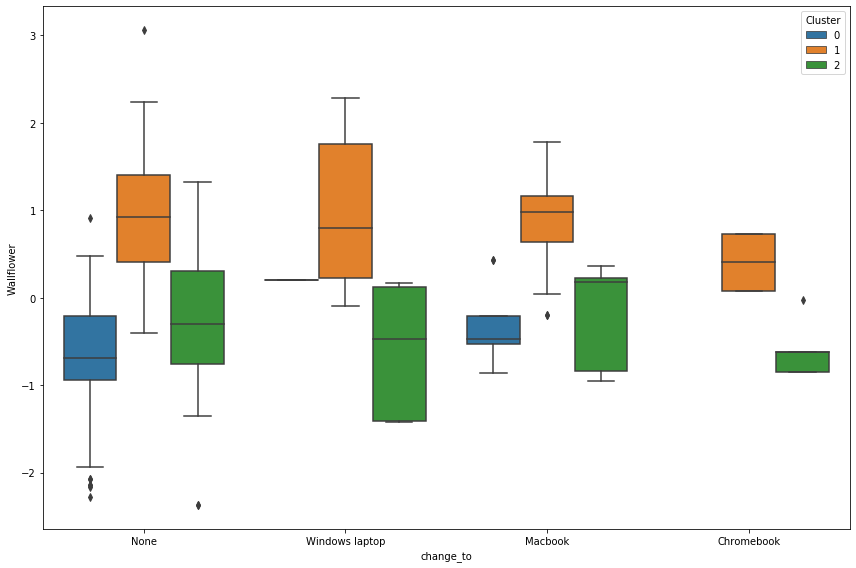

In [34]:
box_plot('change_to', 'Wallflower',  final_pca_clust_Big5_df)

In [35]:
final_pca_clust_Big5_df['Gender'].value_counts()

Male      224
Female    164
Name: Gender, dtype: int64

In [36]:
final_pca_clust_Big5_df['Laptop_current'][final_pca_clust_Big5_df['Gender']=='Female'].value_counts()

Macbook           98
Windows laptop    66
Name: Laptop_current, dtype: int64

In [37]:
final_pca_clust_Big5_df['change_to'][final_pca_clust_Big5_df['Gender']=='Female'].value_counts()

None              140
Macbook            14
Windows laptop      6
Chromebook          4
Name: change_to, dtype: int64

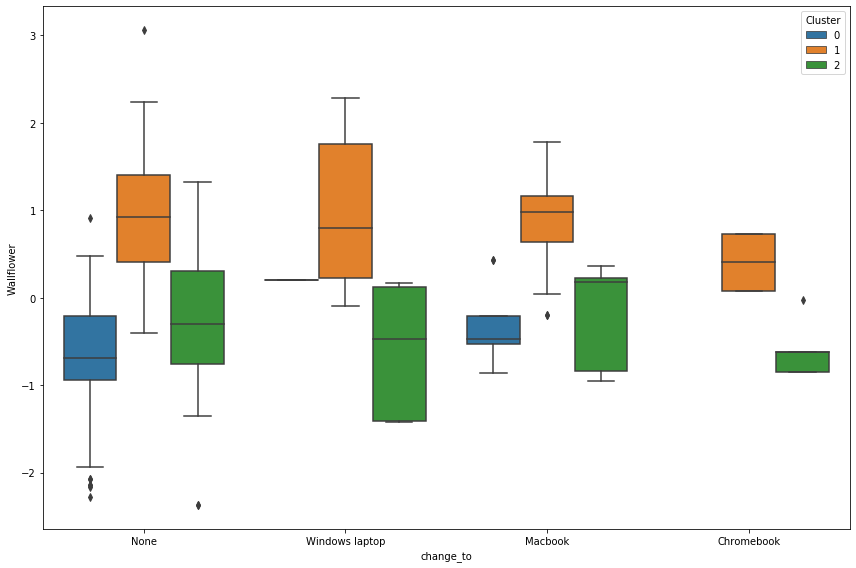

In [38]:
box_plot('change_to', 'Wallflower',  final_pca_clust_Big5_df)

<h3> Part IV - Hult DNA Analysis </h3>

We are going to run an analysis on customer behavior based on 'Hult DNA'.<br><br>
The Hult DNA is a set of core cognitive-behavioral skills that Hult International Business School uses to develop its students. These skills fall into three categories:<br><br>
<strong>1. Thinking:</strong> 
- Shows self-awareness
- Embraces change
- Demonstrates dynamic thinking<br>

<strong>2. Communicating:</strong>
- Speaks and listen carefully
- Influences confidently
- Presents ideas effectively <br>

<strong>3. Team Building:</strong>
- Fosters collaborative relationships
- Inspires productivity
- Resolves conflict constructively<br>
<br>

The questions related to the Hult DNA are going to be extracted in a new dataframe called 'hult_DNA' and we will engineer new features based on these skills to perform our analysis.

In [39]:
# Create a new Dataframe with Hult DNA questions

hult_DNA = students_df[[  "See underlying patterns in complex situations", 
                          "Don't  generate ideas that are new and different", 
                          'Demonstrate an awareness of personal strengths and limitations', 
                          'Display a growth mindset', 
                          'Respond effectively to multiple priorities', 
                          "Take initiative even when circumstances, objectives, or rules aren't clear", 
                          'Encourage direct and open discussions',
                          'Listen carefully to others', 
                          "Don't persuasively sell a vision or idea", 
                          "Build cooperative relationships", 
                          'Work well with people from diverse cultural backgrounds', 
                          'Effectively negotiate interests, resources, and roles', 
                          "Can't rally people on the team around a common goal", 
                          'Translate ideas into plans that are organized and realistic', 
                          'Resolve conflicts constructively', 
                          'Seek and use feedback from teammates', 
                          'Coach teammates for performance and growth', 
                          'Drive for results' 
                        ]]

<h4>Feature Engineering</h4>

New features will be engineered for each skill in a similar to the Big Five personality traits.
<br><br>
Each question in the survey is relevant to behaviors associated with one of the three skills,. If a high response (i.e. 5, being 'agree') on a question meant that the respondent was more likely to demonstrate a behavior towards the respective skill, then it is <i>added</i> in the calculation. Conversely, if a high response on a question meant that the respondent more likely <strong>not</strong> to have the respective skill, then it is <i>subtracted</i> in the calculation.
<br>

In [40]:
# Thinking
hult_DNA['Thinking']      = (   hult_DNA["See underlying patterns in complex situations"]
                              - hult_DNA["Don't  generate ideas that are new and different"] 
                              + hult_DNA["Demonstrate an awareness of personal strengths and limitations"] 
                              + hult_DNA['Display a growth mindset']
                              + hult_DNA['Respond effectively to multiple priorities']
                              + hult_DNA["Take initiative even when circumstances, objectives, or rules aren't clear"]
                              + hult_DNA['Seek and use feedback from teammates'] )

# Communicating
hult_DNA['Communicating'] = (   hult_DNA['Encourage direct and open discussions']
                              + hult_DNA['Listen carefully to others']
                              - hult_DNA["Don't persuasively sell a vision or idea"]
                              + hult_DNA['Translate ideas into plans that are organized and realistic'])

# Team building
hult_DNA['Team building'] = (   hult_DNA['Build cooperative relationships']
                              + hult_DNA['Work well with people from diverse cultural backgrounds']
                              + hult_DNA['Effectively negotiate interests, resources, and roles'] 
                              - hult_DNA["Can't rally people on the team around a common goal"] 
                              + hult_DNA['Resolve conflicts constructively'] 
                              + hult_DNA['Coach teammates for performance and growth'] 
                              + hult_DNA['Drive for results'])


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-v

***
Here, we will drop the questions to keep only our the engineered features.

In [41]:
hult_DNA = hult_DNA.drop([    "See underlying patterns in complex situations", 
                              "Don't  generate ideas that are new and different", 
                              'Demonstrate an awareness of personal strengths and limitations', 
                              'Display a growth mindset', 
                              'Respond effectively to multiple priorities', 
                              "Take initiative even when circumstances, objectives, or rules aren't clear", 
                              'Encourage direct and open discussions',
                              'Listen carefully to others', 
                              "Don't persuasively sell a vision or idea", 
                              "Build cooperative relationships", 
                              'Work well with people from diverse cultural backgrounds', 
                              'Effectively negotiate interests, resources, and roles', 
                              "Can't rally people on the team around a common goal", 
                              'Translate ideas into plans that are organized and realistic', 
                              'Resolve conflicts constructively', 
                              'Seek and use feedback from teammates', 
                              'Coach teammates for performance and growth', 
                              'Drive for results' 
                            ], axis =1)

***
<h4>Scaling the data</h4>

Here, the data will be standardized so that each feature's variance is measured on the same scale.

In [42]:
# Instantiate StandardScaler object
scaler = StandardScaler()

#Fit the data
scaler.fit(hult_DNA)

# Transform the data
X_scaled = scaler.transform(hult_DNA)

# Convert scale data to a dataFrame
hult_DNA_scaled = pd.DataFrame(X_scaled)

#reattach columns
hult_DNA_scaled.columns = hult_DNA.columns

# # checking pre- and post-scaling variance
#print(pd.np.var(hult_DNA))
#print(pd.np.var(hult_DNA_scaled))

<h4>Building a PCA Model</h4>

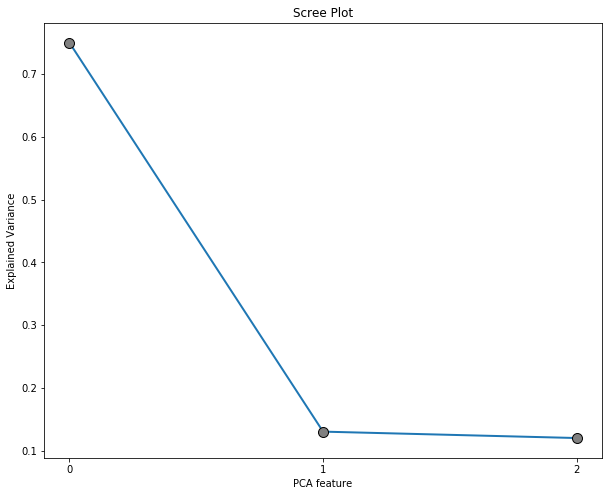

In [43]:
# INSTANTIATING a PCA object with no limit to principal components
pca = PCA(n_components = None,
          random_state = 222)



# FITTING and TRANSFORMING the scaled data
customer_pca = pca.fit_transform(hult_DNA_scaled)


# calling the scree_plot function
scree_plot(pca_object = pca)

<br>The number of components we are going to use is <b>3</b> despite components 1 and 2 being more significant on the scree plot to see the value it adds to the analysis.</br>

In [44]:
# transposing pca components (pc = MAX)
factor_loadings = pd.DataFrame(pd.np.transpose(pca.components_))


# naming rows as original features
factor_loadings = factor_loadings.set_index(hult_DNA_scaled.columns)


# checking the results
print(f"""
Components Factor Loadings
-------------------------------
{factor_loadings.round(2)}

""")


Components Factor Loadings
-------------------------------
                  0     1     2
Thinking      -0.57 -0.80 -0.18
Communicating -0.58  0.55 -0.60
Team building -0.58  0.24  0.78




***
Based on the factor loadings of the three components and their respective correlations to each skill, we decided to rename the principal components based on the latent skills they reflect. The three groups are:
* <strong>Fixed Mindset</strong> : (negative correlation to each skill, indicative of a lack of growth mindset)</br>
* <strong>Impulsive</strong> : (strong negative correlation to Thinking, suggesting they may be spontaneous and act without thought) </br>
* <strong>Team Player</strong> : (strong positive correlation to Team Building, suggesting this group is collaborative and flexible) </br>


In [45]:
# naming each principal component
factor_loadings.columns = [ 'Fixed Mindset',
                            'Impulsive',
                            'Team Player'
                          ] 
# checking the result
factor_loadings

,Fixed Mindset,Impulsive,Team Player
Thinking,-0.573030,-0.800131,-0.177277
Communicating,-0.577816,0.547851,-0.604970
Team building,-0.581176,0.244232,0.776263


***
<br>We will look at the factor loadings on a respondent level, to see how each respondent measures against the identified groups.<br>

In [46]:
# analyzing factor strengths per customer
X_pca_reduced = pca.transform(hult_DNA_scaled)


# converting to a DataFrame
X_pca_df = pd.DataFrame(X_pca_reduced)

X_pca_df.columns = ['Fixed Mindset', #change names
                    'Impulsive',
                    'Team Player'
                   ]

# checking the results
X_pca_df.round(3)

,Fixed Mindset,Impulsive,Team Player
0,-0.042,-0.121,0.076
1,-0.573,0.852,-0.988
2,1.222,0.090,-0.123
3,-0.365,0.312,0.777
4,2.484,0.003,-0.590
5,1.628,-0.978,0.157
6,-0.777,0.192,-0.573
7,-1.303,0.262,0.810
8,-0.490,0.218,-0.006
9,0.449,0.565,0.228


Preparing a scaled version of the factor loadings (i.e. principal components) dataset to ensure that variance is measured on the same scale.

In [47]:
# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with the data
scaler.fit(X_pca_df)


# TRANSFORMING our data after fit
X_scaled = scaler.transform(X_pca_df)


# converting scaled data into a DataFrame
pca_scaled = pd.DataFrame(X_scaled)


# reattaching column names
pca_scaled.columns = [  'Fixed Mindset',
                        'Impulsive',
                        'Team Player'
                     ]

# checking pre- and post-scaling variance
print(pd.np.var(X_pca_df), '\n\n')
print(pd.np.var(pca_scaled))

Fixed Mindset    2.250026
Impulsive        0.390295
Team Player      0.359679
dtype: float64 


Fixed Mindset    1.0
Impulsive        1.0
Team Player      1.0
dtype: float64


***
<strong>Plotting the dendrogram</strong>
<br><br>
Here, a dendrogram of the data will be visualized so that we can decide the best way to allocate the respondents to clusters.

In [48]:
# dendogram(hult_DNA_scaled, 'Hult_dna')

<h4> Inertia Plot </h4>

Here, we will visualize an inertia plot to help decide the number of clusters to use. We want to develop more candidates for the number of clusters we might want to develop.</br>

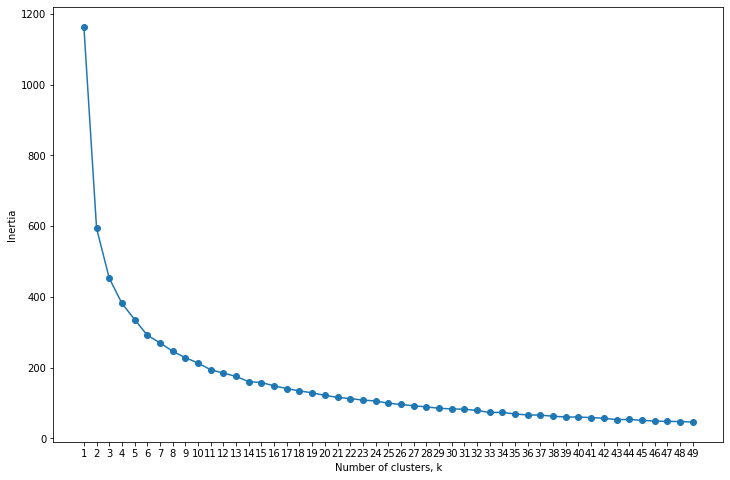

In [49]:
# calling the inertia_plot() function
inertia_plot(data=hult_DNA_scaled)

***
From the inertia plot, we saw that the elbow point was at 3, and after this the change in the value of inertia is insignificant. Additionally, the rate of decrease is consistent until about k = 3. Therefore, we decided that the appropriate number of clusters is <strong>3</strong>.
<br>
Each cluster should have 10% of observations.

In [50]:
# INSTANTIATING a k-Means object with five clusters
hult_DNA_k_pca = KMeans(n_clusters = 3,
                        random_state = 222)


# fitting the object to the data
hult_DNA_k_pca.fit(hult_DNA_scaled)


# converting the clusters to a DataFrame
hult_DNA_kmeans_pca = pd.DataFrame({'Cluster': hult_DNA_k_pca.labels_})


# checking the results
print(hult_DNA_kmeans_pca.iloc[: , 0].value_counts())

0    182
1    122
2     84
Name: Cluster, dtype: int64


<h4>Centroids</h4>

Here, we are displaying the centroids, or the mean value for each cluster.

In [51]:
# storing cluster centers
centroids_pca = hult_DNA_k_pca.cluster_centers_


# converting cluster centers into a DataFrame
centroids_pca_df = pd.DataFrame(centroids_pca)


# renaming principal components
centroids_pca_df.columns = ['Fixed Mindset',
                            'Impulsive',
                            'Team Player'
                            ]

# checking results (clusters = rows, pc = columns)
centroids_pca_df.round(2)

,Fixed Mindset,Impulsive,Team Player
0,-0.08,-0.15,-0.06
1,0.93,1.00,0.97
2,-1.18,-1.13,-1.28


<h4>Re-adding Demographic Data</h4>

After our PCA and clustering, we're ready to add the demographic data back into the dataset to see if it adds any value to the already-defined clusters, and if any additional insight can be drawn using the demographic data in conjunction with behavioral data.<br>
Here, we will concatenate 'Laptop_current','Laptop_new','Program','Age','Gender','Nationality','Ethnicity', clusters and PCA components into one DataFrame.

In [52]:
# concatenating cluster memberships with principal components
clst_pca_df = pd.concat([hult_DNA_kmeans_pca,
                          X_pca_df],
                          axis=1)


# checking results
clst_pca_df


# concatenating demographic information with pca-clusters
# final_pca_clust_df = pd.concat([students_df.loc[ : , [69,70,71,72,73,74,75,76,77,78,79]],
#                                   clst_pca_df],
#                                   axis=1)
final_pca_clust_df = pd.concat([students_df.iloc[ : , [69,70,71,72,73,74,75,76,77,78,79]],
                                  clst_pca_df],
                                  axis = 1)

# renaming columns
final_pca_clust_df.columns = ['Laptop_current',
                              'Laptop_new',
                              'Program',
                              'Age',
                              'Gender',
                              'Nationality',
                              'Ethinicity',
                              'laptop_change',
                              'change_to',
                              'Windows_same',
                              'Macbook_same',
                              'Cluster',
                              'Fixed Mindset',
                              'Impulsive',
                              'Team Player']

***
For a better understanding of consumers' attitudes towards their current laptop, we will create new columns showing the change in laptop if given the possibility, and columns to show which brand the user is willing to keep. <br><br>
If a respondent would rather switch to a different laptop than their current one without taking price into consideration, then the new column, <strong>'laptop_change'</strong>, will be filled with 'Change'; otherwise, it will be filled with 'Same'. 
<br><br>
If there is a change, the new column, <strong>'change_to'</strong>, will be filled with either 'Macbook', 'Windows laptop', or 'Chromebook' depending on which laptop the respondent would like to switch to; otherwise, it will be filled with 'None' (as there is no change).

In [53]:
data_df= final_pca_clust_df.copy()
data_df.head(n=5)

,Laptop_current,Laptop_new,Program,Age,Gender,Nationality,Ethinicity,laptop_change,change_to,Windows_same,Macbook_same,Cluster,Fixed Mindset,Impulsive,Team Player
0,Macbook,Macbook,DD (MIB & Business Analytics),25,Female,Ecuadorian,Hispanic / Latino,Same,None,0,1,0,-0.042201,-0.121072,0.076027
1,Windows laptop,Windows laptop,One year Business Analytics,27,Male,Ecuadorian,Hispanic / Latino,Same,None,1,0,0,-0.573283,0.852217,-0.987511
2,Windows laptop,Windows laptop,One year Business Analytics,25,Male,Indian,West Asian / Indian,Same,None,1,0,2,1.221839,0.089685,-0.123025
3,Windows laptop,Windows laptop,One year Business Analytics,26,Female,Indian,West Asian / Indian,Same,None,1,0,0,-0.365212,0.312267,0.776965
4,Macbook,Windows laptop,DD (MBA & Disruptive innovation),27,Male,Chinese,Far east Asian,Change,Windows laptop,0,0,2,2.484333,0.003495,-0.589512


<h4>Analysis</h4>

We are analyzing the demographic data with the clusters in box plots to see if there is any separation and variance among the different demographic groups in relation to the defined behavioral clusters.

In [54]:
# #Laptop Current
# ---------------
# box_plot('Laptop_current', 'Fixed Mindset',  data_df)
# box_plot('Laptop_current', 'Impulsive', data_df)
# box_plot('Laptop_current', 'Team Player', data_df)

# #Laptop New
# ------------
# box_plot('Laptop_new', 'Fixed Mindset',  data_df)
# box_plot('Laptop_new', 'Impulsive', data_df)
# box_plot('Laptop_new', 'Team Player', data_df)

# #Laptop Change
# --------------
# box_plot('laptop_change', 'Fixed Mindset',  data_df)
# box_plot('laptop_change', 'Impulsive', data_df)
# box_plot('laptop_change', 'Team Player', data_df)


<Strong> Conclusion </strong>
<br>The Hult DNA skills appear to have no significant difference in respondents’ behaviors. This may be attributed to the fact that a growth mindset, the ultimate success measure of the Hult DNA skills, takes time to develop and builds up long-term. It takes an average of 66 days to develop a new habit, which can “vary widely depending on the behavior, the person, and the circumstances”, and requires constant repetition of that behavior <a href="https://onlinelibrary.wiley.com/doi/abs/10.1002/ejsp.674">(Lally, 2010).</a>
 
This is to say that the growth mindset must be practiced rather than just preached, and there is no guarantee that students have inherently adopted this mindset nor that they want to personally put in the effort to do so. 
Therefore, it may not be a good measure to get insight into consumer buying behaviors and decision-making processes.</br>
<br>Further, the same survey could be administered to Hult alumni whom have had a longer time to imbibe the growth mindset skills. This will help us understand whether the differences in clusters are significant and if positive, we can do a separate analysis to get further insights.</br>